INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


           ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572


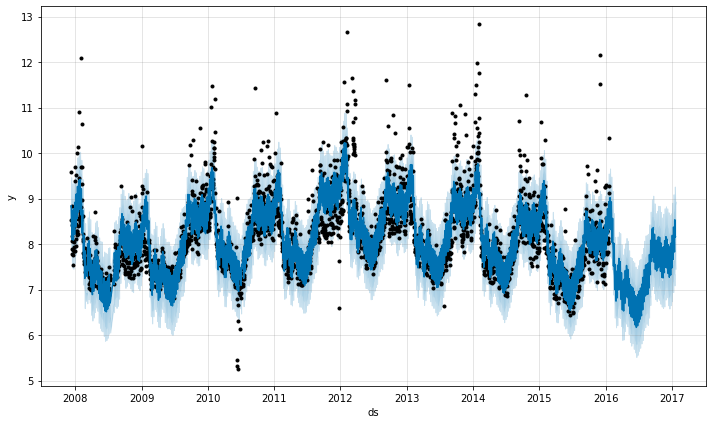

In [4]:
# https://taetaetae.github.io/2018/05/31/anomaly-detection/
# https://zzsza.github.io/data/2019/02/06/prophet/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from pykrx import stock

from datetime import datetime, timedelta
import os

# matplotlib.use('Agg')

# 그래프 사전작업
def setKoFont():
    from matplotlib import font_manager, rc
    # font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() # 음수의 경우 "-" 글자가 깨짐
    # font_name = font_manager.FontProperties(fname="res/D2Coding.ttf").get_name()
    font_name = "gulim"
    rc("font", family=font_name)
    plt.rcParams["font.size"] = 15
    plt.rcParams["figure.figsize"] = (14, 8)

# 테스트용 데이터
df=pd.read_csv("res/example_wp_log_peyton_manning.csv")
print(df.head(5))

# 예측
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)

fig = m.plot(forecast)
plt.show()
